In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from astropy.coordinates import SkyCoord, EarthLocation
from astropy import units as u
from astropy.time import Time

In [4]:
rg="604"
reg='\\604b'

In [5]:
T=8150#K Table 5

https://iopscience.iop.org/article/10.1088/0004-637X/700/1/654

In [6]:
RA=23.638292#J2000
Dec=30.784889#J200

https://ned.ipac.caltech.edu/byname?objname=ngc%20604&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1

In [7]:
inputfile=dict()
inputfile[0]='Obs\ISIS.604.Blue.txt'

Arm Data

In [8]:
#Ha,[NII],[SII]

#LineN=['H$_{α}$ 6563','[NII]λ6548','[NII]λ6584','[SII]λ6717','[SII]λ6731']
#line=['Ha','Nb','Na','Sb','Sa']
#l=[6562.8,6548,6584,6717,6731]#AngstromsR
#SI=[18,12,12,15,15]#km/s
#XW=[1.00794,14.0067,14.0067,32.065,32.065]
#color=['green','red','red','purple','purple']

#Hb,[OIII]

LineN=['H$_{β}$ 4861','[OIII]λ4959','[OIII]λ5007']
LineM=['Hb4861','OIII4959','OIII5007']
LineD=['Hx','Ox','O']

line=['Hb','Ob','O4']
l=[4861.36,4958.9,5006.9]#AngstromsB
SI=[18,19,19]#km/s
XW=[1.00794,15.9994,15.9994]
color=['purple','blue','blue']

n=len(l)


In [9]:
Data=pd.read_table(inputfile[0])
Data=Data.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

In [10]:
Data

,Pos,X,Y,Slit,Archivo,Center.0,ErrC.0,Width.0,ErrW.0,Peak.0,...,Line.1,ErrL.1,Center.2,ErrC.2,Width.2,ErrW.2,Peak.2,ErrP.2,Line.2,ErrL.2
0,1,214.5600,19.6,1,604a1_779-001004.xlsx,4809.715,10.003,-14.310,0.000,2.583,...,10.250,17.820,4961.214,27.812,41.454,52.778,0.6969,0.4512,30.75,53.460
1,2,213.1296,19.6,1,604a1_779-005008.xlsx,4861.424,10.792,-4.098,51.891,-4.734,...,-8.312,-8.531,4998.893,0.692,4.125,0.000,-5.6790,0.0000,-24.94,-25.590
2,3,211.6992,19.6,1,604a1_779-009012.xlsx,4855.140,0.822,2.562,1.256,-5.215,...,-64.520,-22.320,5022.750,12.843,69.658,32.632,-2.6100,0.7990,-193.60,-66.960
3,4,210.2688,19.6,1,604a1_779-013016.xlsx,4852.843,0.305,-1.164,0.923,-9.482,...,-3.841,-1.507,5004.753,0.192,0.961,0.346,-11.2600,4.0020,-11.52,-4.521
4,5,208.8384,19.6,1,604a1_779-017020.xlsx,4875.295,0.294,0.489,0.375,8.143,...,-1.367,-4.403,5004.175,0.000,0.787,0.000,-4.8920,0.0000,-4.10,-13.210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,146,7.1520,0.0,10,604a10_797-581584.xlsx,4856.928,0.161,-0.627,0.279,-14.500,...,69.770,28.860,5030.822,19.344,-94.366,32.250,-2.0840,0.4448,209.30,86.570
1496,147,5.7216,0.0,10,604a10_797-585588.xlsx,4857.439,1.123,5.041,2.315,-5.168,...,-6.108,-2.878,5000.963,0.715,2.900,1.353,-5.9360,2.7850,-18.32,-8.635
1497,148,4.2912,0.0,10,604a10_797-589592.xlsx,4856.136,0.844,2.055,1.016,-4.560,...,-9.537,-3.753,5005.201,0.987,4.789,2.062,-5.6130,2.7540,-28.61,-11.260
1498,149,2.8608,0.0,10,604a10_797-593596.xlsx,4854.656,0.306,0.592,0.236,18.680,...,-3755.000,-8549.000,5138.393,315.693,843.770,577.680,-12.5400,21.6200,-11270.00,-25650.000


In [11]:
Data.columns

Index(['Pos', 'X', 'Y', 'Slit', 'Archivo', 'Center.0', 'ErrC.0', 'Width.0',
       'ErrW.0', 'Peak.0', 'ErrP.0', 'Line', 'ErrL', 'Center.1', 'ErrC.1',
       'Width.1', 'ErrW.1', 'Peak.1', 'ErrP.1', 'Line.1', 'ErrL.1', 'Center.2',
       'ErrC.2', 'Width.2', 'ErrW.2', 'Peak.2', 'ErrP.2', 'Line.2', 'ErrL.2'],
      dtype='object')

In [12]:
sz=3
wd=Data.X.max()-Data.X.min()
hd=Data.Y.max()-Data.Y.min()
ar=wd/hd

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


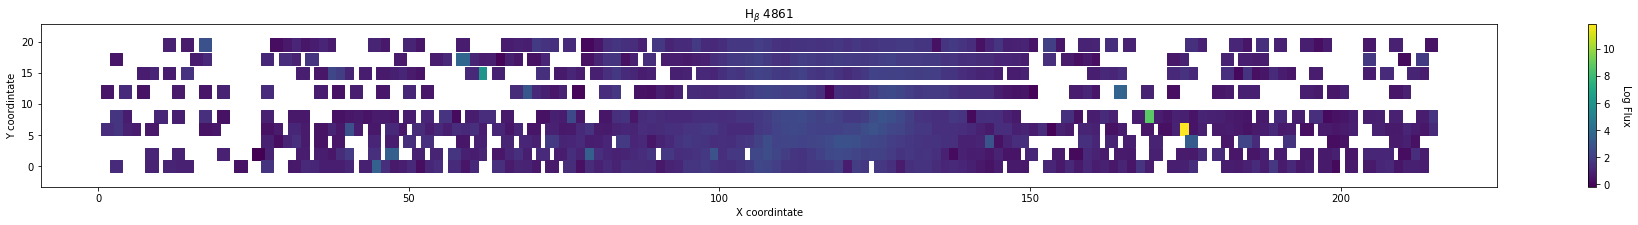

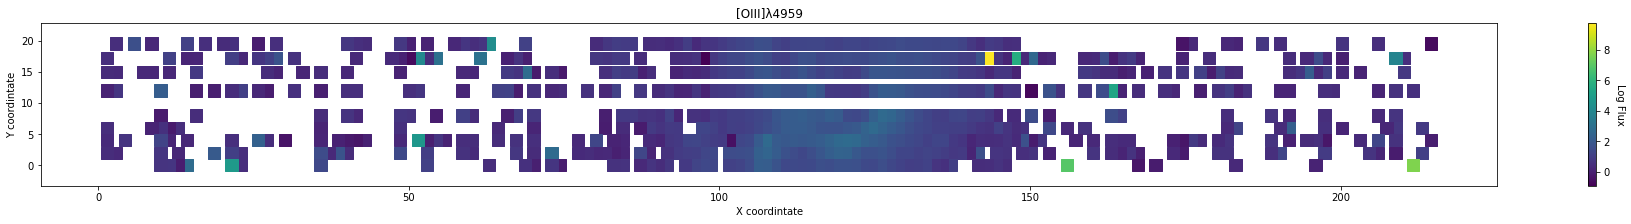

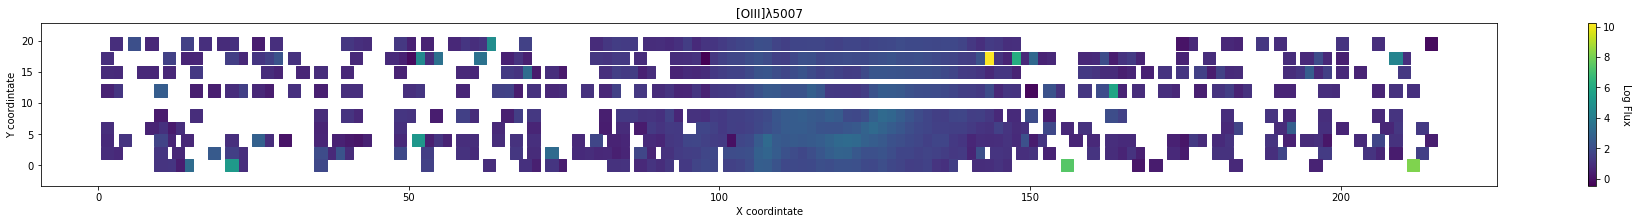

In [13]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    #fig, ax = plt.subplots(figsize=(15, 5))
    plt.scatter(Data.X,Data.Y,c=np.log10(Data['Peak.'+str(i)]), s=150,marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)  
    
    plt.savefig(rg+reg+'\Imgs\ISIS\ '+LineM[i]+'.png')

Mask 01: X corrdinate filter

Type A sample: SABRE

In [14]:
m01=(Data.X>100)&(Data.X<140)
Data01=Data[m01]

sz=3
wd=Data01.X.max()-Data01.X.min()
hd=Data01.Y.max()-Data01.Y.min()
ar=wd/hd

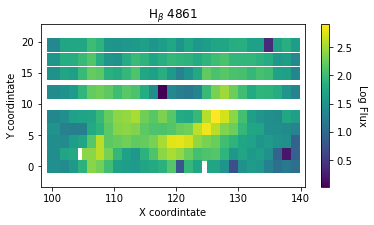

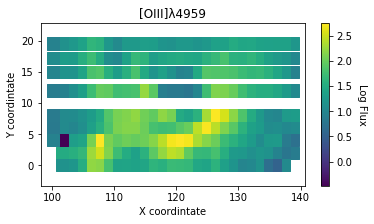

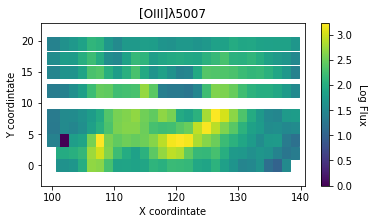

In [15]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(Data01.X,Data01.Y,c=np.log10(Data01['Peak.'+str(i)]), s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)

    plt.savefig(rg+reg+'\Imgs\A\F'+LineM[i]+'.png')

Tables individual lines

In [16]:
argo=dict()

for i in range(n):
    data=[Data01['X'],Data01['Y'],Data01['Center.'+str(i)],Data01['Peak.'+str(i)],Data01['Width.'+str(i)]]
    headers=["X","Y","Center","Peak","Width"]

    argo[i]=pd.concat(data,axis=1,keys=headers)
    

RadialVelocity

$$\dfrac{\lambda_{obs}-\lambda}{\lambda}*c + CorrHel $$

In [17]:
orm = EarthLocation.of_site('Roque de los Muchachos')
sc = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
heliocorr = sc.radial_velocity_correction('heliocentric', obstime=Time('1992-8-18'), location=orm) 
heliocorr.to(u.km/u.s) 

<Quantity 25.94942746 km / s>

In [18]:
#Iraf
corrhelio=np.array(heliocorr.to(u.km/u.s))

#Constant
c=299792.459#km/s

for i in range(n):
    RVo=c*(argo[i].Center-l[i])/l[i]
    RV=RVo+corrhelio

    argo[i]=argo[i].assign(RV=RV.values)

Sigma Disp

$$\sigma_{disp}^{2}=\sigma_{obs}^{2}-\sigma_{therm}^{2}-\sigma_{inst}^{2}$$

$$ \sigma_{obs} = \frac{0.6006}{1.414}* \frac{Width}{\lambda}*c , \sigma_{therm}^{2} = \frac{166.3}{1.414} \frac{T_{e} \times 10^{-4}}{Xw}$$

In [19]:
#Atomic Weights
Hw=1.00794#
Nw=14.0067#
Sw=32.065#
Ow=15.9994#

#SigmaInst
SigmaInstH=18#km/s
SigmaInstN=12#km/s
SigmaInstS=15#km/s
SigmaInstO=19#km/s

#Constant
c=299792.459#km/s

In [20]:
SigmaObs=dict()

for i in range(n):
    #SigmaObs
    a=0.6006/1.414
    SigmaObs[i]=a*(argo[i].Width/l[i])*c
    
    #SigmaTerm
    b=166.6/1.414
    SigmaTerm=np.sqrt(b*(T/10000)/XW[i])

    SigmaDisp=np.sqrt(SigmaObs[i]**2-SigmaTerm**2-SI[i]**2)

    argo[i]=argo[i].assign(Sig=SigmaDisp.values)

    print(SigmaTerm)

9.760549267258416
2.4498514436913466
2.4498514436913466


C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
for i in range(n):
    print(argo[i].describe())    

                X           Y       Center           Peak       Width  \
count  280.000000  280.000000   280.000000     280.000000  280.000000   
mean   119.438400    9.390000  4336.603439    -394.567200   -1.814064   
std     11.575098    6.262024  1504.937228    7398.681007   28.854004   
min    100.128000    0.000000     0.000000 -122900.000000 -345.624000   
25%    109.783200    4.000000  4857.025000      29.622500    0.862750   
50%    119.438400    9.000000  4857.180000      55.140000    0.988000   
75%    129.093600   15.000000  4857.308250     121.200000    1.152750   
max    138.748800   19.600000  4860.177000     823.900000   74.950000   

                  RV          Sig  
count     280.000000   244.000000  
mean   -32334.965977   119.373227  
std     92807.122356   802.318239  
min   -299766.509573     1.567521  
25%      -241.383235    13.026669  
50%      -231.824627    17.426808  
75%      -223.915651    24.406529  
max       -47.004330  9053.189704  
                X 

In [22]:
argom01=dict()

for i in range(n):
    m02=(argo[i].X>100)&(argo[i].X<131)&(argo[0].RV>-250)&(argo[0].RV<-200)
    #m02=(argo[0].RV>-250)&(argo[0].RV<-200)
    argom01[i]=argo[i][m02]
    

sz=3
wd=argom01[0].X.max()-argom01[0].X.min()
hd=argom01[0].Y.max()-argom01[0].Y.min()
ar=wd/hd

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


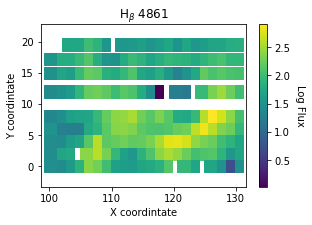

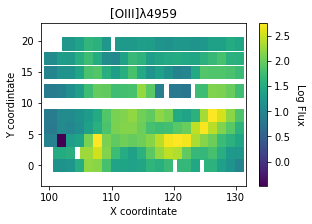

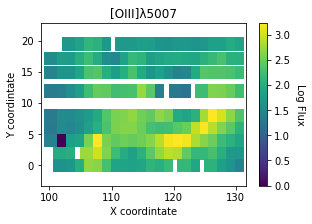

In [23]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argom01[i].X,argom01[i].Y,c=np.log10(argom01[i].Peak), s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\B\F'+LineM[i]+'.png')

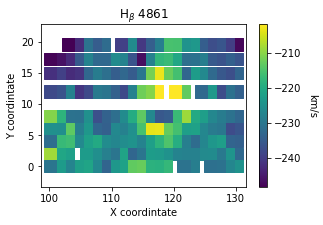

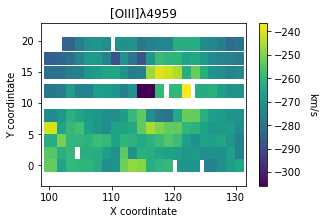

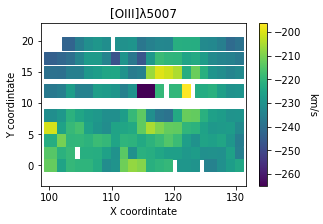

In [24]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argom01[i].X,argom01[i].Y,c=argom01[i].RV, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\B\F'+LineM[i]+'.png')

In [25]:
for i in range(n):
    print(argom01[i].describe())    

                X           Y       Center        Peak       Width  \
count  190.000000  190.000000   190.000000  190.000000  190.000000   
mean   115.245069    9.268421  4857.255147  128.068989   -1.651158   
std      9.075682    6.517267     0.148081  129.666454   27.726134   
min    100.128000    0.000000  4856.914000    1.062000 -345.624000   
25%    107.280000    4.000000  4857.158250   47.942500    0.914500   
50%    115.147200    8.000000  4857.243000   81.475000    1.000000   
75%    123.014400   15.000000  4857.337000  163.750000    1.182000   
max    130.166400   19.600000  4857.668000  823.900000    2.103000   

               RV          Sig  
count  190.000000   188.000000  
mean  -227.190407    89.260876  
std      9.131922   725.637428  
min   -248.228431     1.567521  
25%   -233.165916    13.099577  
50%   -227.939516    16.793583  
75%   -222.142683    23.874119  
max   -201.730431  9053.189704  
                X           Y       Center        Peak       Width  \
co

Statistical Filter

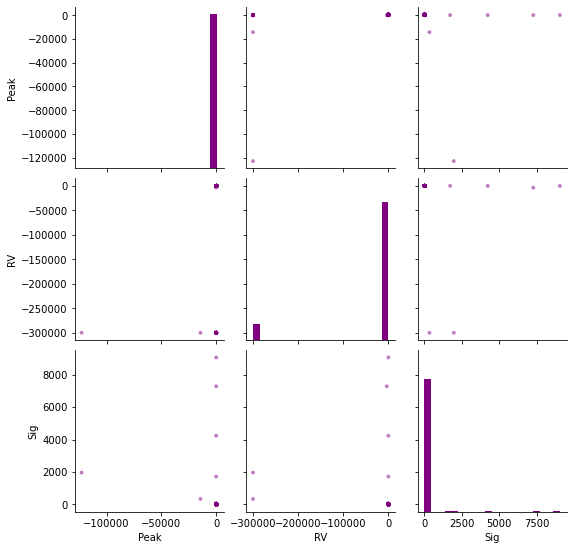

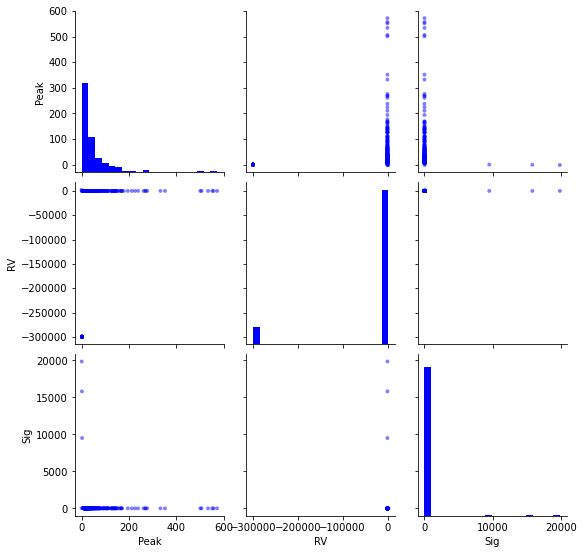

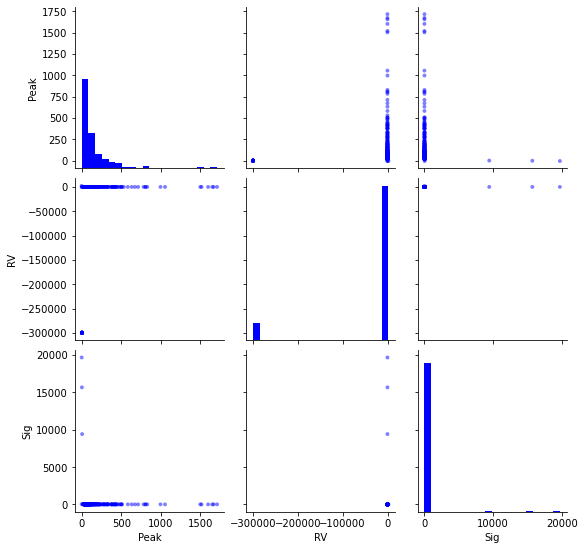

In [26]:
for i in range(n):

    sns.pairplot(argo[i],
                 vars=["Peak", "RV", "Sig"],
                 diag_kind='hist',
                 plot_kws=dict(alpha=0.5, s=15, edgecolor='none',color=color[i]),
                 diag_kws=dict(bins=20,color=color[i]),
                )



In [27]:
m=(argo[0].RV>-250)&(argo[0].RV<-200)&(argo[0].Sig<100)&(argo[1].Sig<100)&(argo[2].Sig<100)


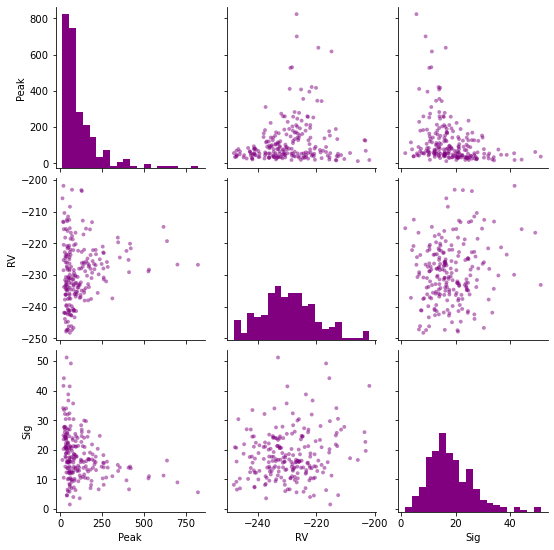

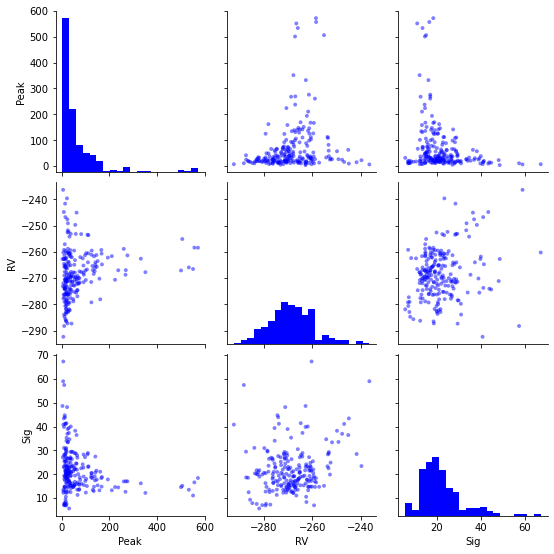

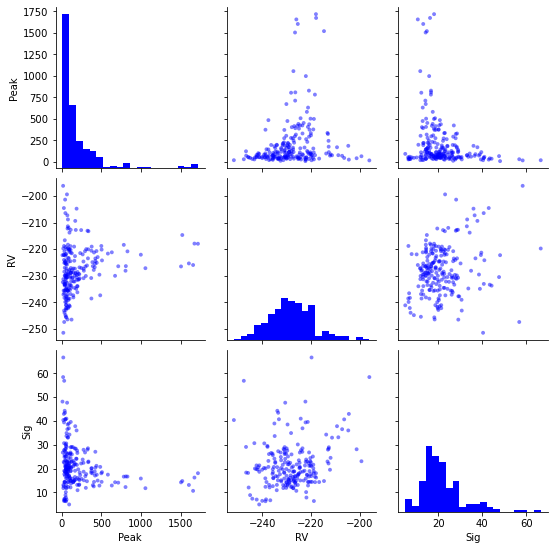

In [28]:
for i in range(n):

    sns.pairplot(argo[i][m],
                 vars=["Peak", "RV", "Sig"],
                 diag_kind='hist',
                 plot_kws=dict(alpha=0.5, s=15, edgecolor='none',color=color[i]),
                 diag_kws=dict(bins=20,color=color[i]),
                )
    plt.savefig(rg+reg+'\Imgs\Corrl\ '+LineM[i]+'.png')

In [29]:
sz=3
wd=argo[0][m].X.max()-argo[0][m].X.min()
hd=argo[0][m].Y.max()-argo[0][m].Y.min()
ar=wd/hd

<ipython-input-30-cafa44a77216>:3: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(argo[i][m].X,argo[i][m].Y,c=np.log10(argo[i][m]).Peak, s=150, marker='s')
<ipython-input-30-cafa44a77216>:3: RuntimeWarning: invalid value encountered in log10
  plt.scatter(argo[i][m].X,argo[i][m].Y,c=np.log10(argo[i][m]).Peak, s=150, marker='s')


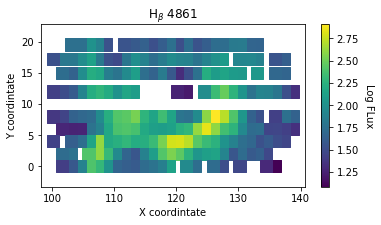

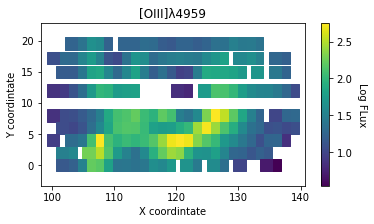

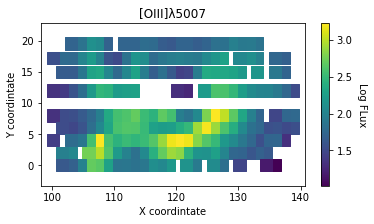

In [30]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m].X,argo[i][m].Y,c=np.log10(argo[i][m]).Peak, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log FLux', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\C\F'+LineM[i]+'.png')

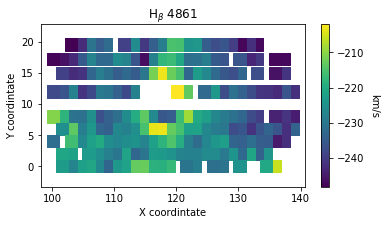

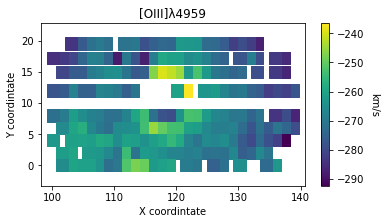

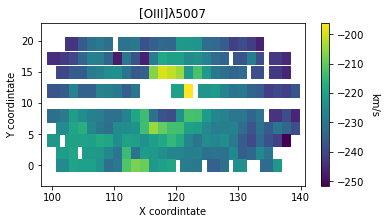

In [31]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m].X,argo[i][m].Y,c=argo[i][m].RV, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\C\RV'+LineM[i]+'.png')

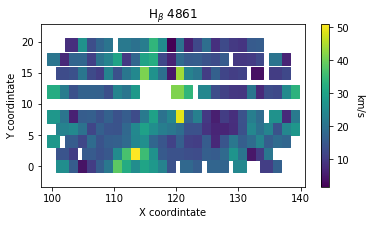

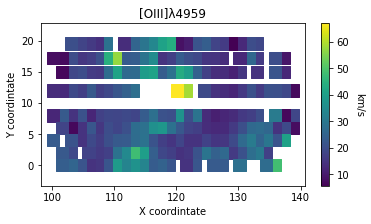

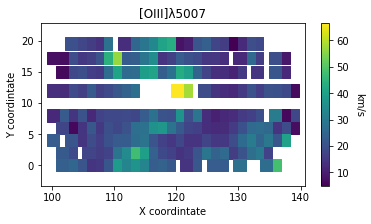

In [32]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m].X,argo[i][m].Y,c=argo[i][m].Sig, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    #cbar.ax.set_yticklabels(['0','1','2','>3'])
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\C\Sig'+LineM[i]+'.png')

In [33]:
for i in range(n):
    print(argo[i][m].describe())    

                X           Y       Center        Peak       Width  \
count  216.000000  216.000000   216.000000  216.000000  216.000000   
mean   118.696711    9.296759  4857.221958  118.689352    1.013398   
std     10.855064    6.397960     0.154417  124.353529    0.403573   
min    100.128000    0.000000  4856.914000   12.030000   -1.255000   
25%    108.710400    4.000000  4857.117000   44.365000    0.914500   
50%    118.723200    8.000000  4857.212000   75.635000    1.000500   
75%    127.305600   15.000000  4857.317500  145.825000    1.162250   
max    138.748800   19.600000  4857.666000  823.900000    2.103000   

               RV         Sig  
count  216.000000  216.000000  
mean  -229.237123   18.146540  
std      9.522643    8.222159  
min   -248.228431    1.567521  
25%   -235.709739   12.768578  
50%   -229.851237   16.627871  
75%   -223.345218   22.723163  
max   -201.853768   51.138590  
                X           Y       Center        Peak       Width  \
count  216.

 $\sigma_{disp}$ vs I (a.k.a. Peak)

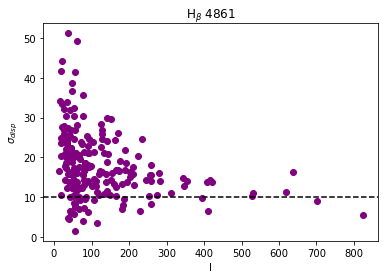

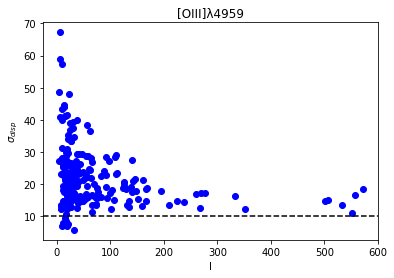

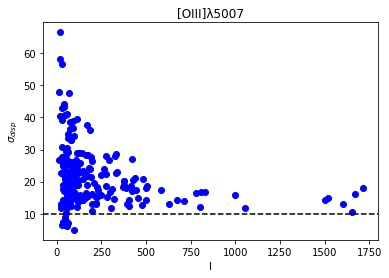

In [34]:
for i in range(n):
    fig, ax = plt.subplots()
    plt.scatter(argo[i][m].Peak,argo[i][m].Sig,color=color[i])
    plt.title(LineN[i])
    plt.axhline(y=10, color='k', linestyle='--')
    ax.set_xlabel('I')
    ax.set_ylabel('$σ_{disp}$')
    plt.savefig(rg+reg+'\Imgs\SvsI\SI'+LineM[i]+'.png')

Ratios

In [35]:
m01=(Data.X>65)&(Data.X<145)
Data01=Data[m01]

sz=3
wd=Data01.X.max()-Data01.X.min()
hd=Data01.Y.max()-Data01.Y.min()
ar=wd/hd

[OIII]/Hb Ratio

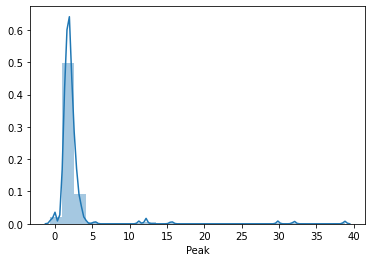

In [36]:
OHRatio=(argo[1].Peak+argo[2].Peak)/argo[0].Peak
sns.distplot(OHRatio,bins=25)

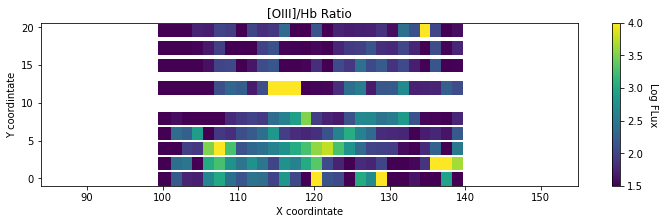

In [37]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
#plt.scatter(argo[0][m04].X,argo[0][m04].Y,c=SHRatio[m04], s=150, marker='s')
plt.scatter(argo[0].X,argo[0].Y,c=OHRatio, s=150, marker='s')
#plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
plt.axis('equal')
plt.title('[OIII]/Hb Ratio')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
    
cbar = plt.colorbar()
cbar.set_label('Log FLux', rotation=270, labelpad=15)
plt.clim(1.5,4)

plt.savefig(rg+reg+'\Imgs\RD\OR'+LineM[i]+'.png')

Export Samples for statistical analysis

In [38]:
#argo[0].to_csv(rg+reg+'\Data\ISIS\A\ '+LineM[0]+'.csv')

In [39]:
argo[0].to_csv('Res\ 604I'+LineD[0]+'A.csv')

In [40]:
#for i in range(n):
#    argom01[i].to_csv(rg+reg+'\Data\ISIS\B\ '+LineM[i]+'.csv')

In [41]:
for i in range(n):
    argom01[i].to_csv('Res\ 604I'+LineD[i]+'B.csv')

In [42]:
#for i in range(n):
#    argo[i][m].to_csv(rg+reg+'\Data\ISIS\C\ '+LineM[i]+'.csv')

In [43]:
for i in range(n):
    argo[i][m].to_csv('Res\ 604I'+LineD[i]+'C.csv')

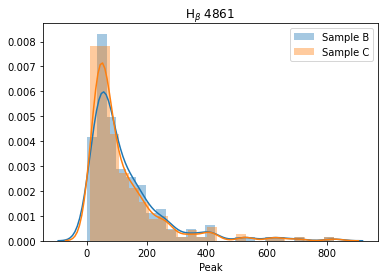

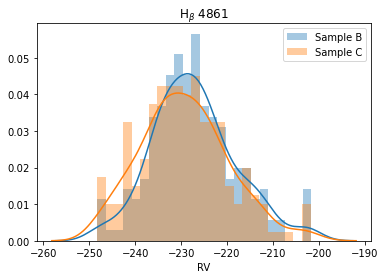

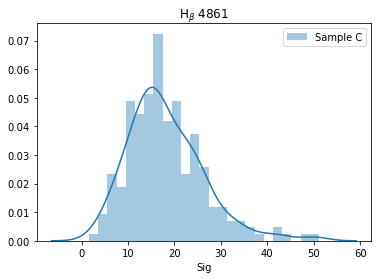

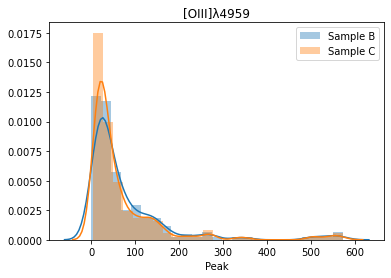

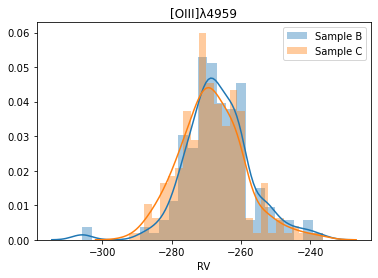

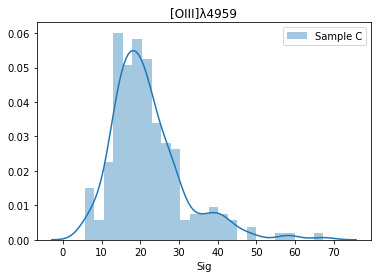

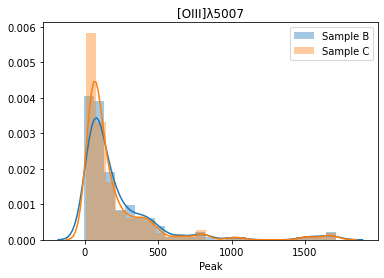

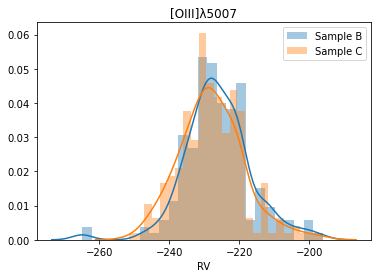

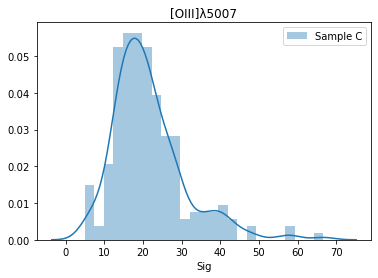

In [44]:
for i in range(n):

    fig, ax = plt.subplots()
    sns.distplot(argom01[i].Peak,bins=25,label='Sample B')
    sns.distplot(argo[i][m].Peak,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\F'+LineM[i]+'.png')

    fig, ax = plt.subplots()
    sns.distplot(argom01[i].RV,bins=25,label='Sample B')
    sns.distplot(argo[i][m].RV,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\RV'+LineM[i]+'.png')

    fig, ax = plt.subplots()
    sns.distplot(argo[i][m].Sig,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\S'+LineM[i]+'.png')

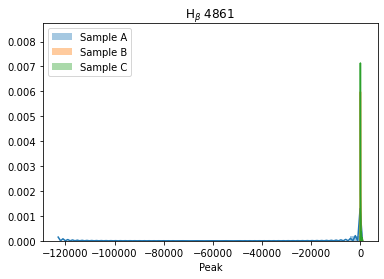

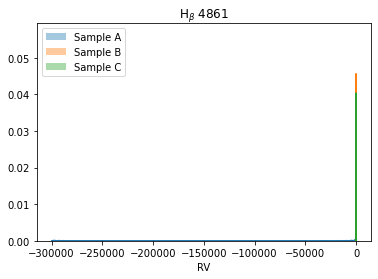

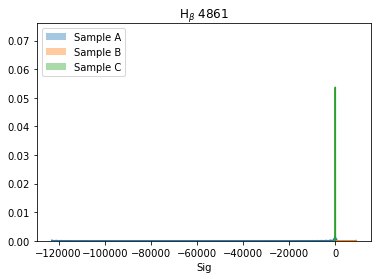

In [45]:
for i in range(1):

    fig, ax = plt.subplots()
    sns.distplot(argo[i].Peak,bins=25,label='Sample A')
    sns.distplot(argom01[i].Peak,bins=25,label='Sample B')
    sns.distplot(argo[i][m].Peak,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\F'+LineM[i]+'x.png')

    fig, ax = plt.subplots()
    sns.distplot(argo[i].RV,bins=25,label='Sample A')
    sns.distplot(argom01[i].RV,bins=25,label='Sample B')
    sns.distplot(argo[i][m].RV,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\RV'+LineM[i]+'x.png')

    fig, ax = plt.subplots()
    sns.distplot(argo[i].Peak,bins=25,label='Sample A')
    sns.distplot(argom01[i].Sig,bins=25,label='Sample B')
    sns.distplot(argo[i][m].Sig,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\S'+LineM[i]+'x.png')

In [46]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 28.07207179069519 seconds ---
